## TP2


### Mise en place de l'environnement

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Chargement des données

In [17]:
order_products_prior_specials = pd.read_csv("données/order_products__prior_specials.csv")
order_distance_stores_softmax = pd.read_csv("données/orders_distance_stores_softmax.csv")

In [18]:
merged_order = pd.merge(order_products_prior_specials, order_distance_stores_softmax, on="order_id")
merged_order = merged_order.dropna()

print(merged_order.nunique())
merged_order = merged_order.drop("eval_set", 1)  # car une seule valeur

merged_order.to_csv("données/merged_order.csv")

Unnamed: 0_x              1158441
order_id                   134652
product_id                  24783
add_to_cart_order              98
reordered                       2
special                         4
Unnamed: 0_y               134652
user_id                      1374
store_id                       10
distance                    13736
eval_set                        1
order_number                   98
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64


C:\Users\padda\AppData\Local\Temp/ipykernel_22332/1863952624.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged_order = merged_order.drop("eval_set", 1)  # car une seule valeur


### Suppression de données

On sélectionne 5% des utilisateurs de façon aléatoire 

In [19]:
all_users = merged_order["user_id"].unique()
nb_users = len(all_users)
reduced_nb_users = nb_users * 5 // 100

restricted_users = np.random.choice(all_users, size=reduced_nb_users)
restricted_order = merged_order.loc[merged_order["user_id"].isin(restricted_users)]

# restricted_order.to_csv("données/restricted_order.csv")

In [38]:
def z_score(sample, data):
    return abs(sample.mean()-data.mean())/data.std()
z_score(restricted_order, merged_order)

Unnamed: 0_x              0.009554
order_id                  0.009547
product_id                0.010096
add_to_cart_order         0.022530
reordered                 0.006198
special                   0.001867
Unnamed: 0_y              0.004307
user_id                   0.002612
store_id                  0.019546
distance                  0.074167
order_number              0.012259
order_dow                 0.002925
order_hour_of_day         0.077025
days_since_prior_order    0.009250
dtype: float64

Les moyennes des données échantillonnées se retrouvent à moins d'un "standard deviation" des moyennes de l'ensemble de données complet, ce qui veut dire que les données échantillonnées reflètent la distribution de l'ensemble de données complet.

### Séparation des données

In [33]:
test_prop = 0.2
train_df, test_df = train_test_split(restricted_order, test_size=test_prop)

full_train_df = train_df.copy()
full_train_df['set'] = "train"

full_test_df = test_df.copy()
full_test_df['set'] = "test"

full_df = full_train_df.append(full_test_df)
full_df.head()

,Unnamed: 0_x,order_id,product_id,add_to_cart_order,reordered,special,Unnamed: 0_y,user_id,store_id,distance,order_number,order_dow,order_hour_of_day,days_since_prior_order,set
233127,233127,683786,47611,1,1,0,107273,163400,4,1.611043,43,0,17,2.0,train
1083341,1083341,3160165,28535,4,1,0,77166,114751,4,1.482887,60,2,9,1.0,train
278909,278909,816497,260,4,1,0,121791,183981,2,1.462649,87,0,9,1.0,train
495219,495219,1446009,49287,7,0,30,9614,12166,0,2.260393,85,2,15,6.0,train
394979,394979,1155735,21137,8,1,0,114100,173963,5,0.278003,57,0,14,1.0,train


In [73]:
z_score(train_df, merged_order)

Unnamed: 0_x              0.008641
order_id                  0.008628
product_id                0.012145
add_to_cart_order         0.025965
reordered                 0.005903
special                   0.000517
Unnamed: 0_y              0.007910
user_id                   0.006229
store_id                  0.016589
distance                  0.073497
order_number              0.014615
order_dow                 0.001911
order_hour_of_day         0.076676
days_since_prior_order    0.011369
dtype: float64

In [74]:
z_score(test_df, merged_order)

Unnamed: 0_x              0.013208
order_id                  0.013225
product_id                0.001898
add_to_cart_order         0.008791
reordered                 0.007374
special                   0.011404
Unnamed: 0_y              0.010104
user_id                   0.011855
store_id                  0.031373
distance                  0.076849
order_number              0.002837
order_dow                 0.022271
order_hour_of_day         0.078422
days_since_prior_order    0.000777
dtype: float64

Les moyennes des données train et test se retrouvent à moins d'un "standard deviation" des moyennes de l'ensemble de données complet, ce qui veut dire que les données échantillonnées reflètent la distribution de l'ensemble de données complet.

### Visualisation des données

<Figure size 720x720 with 0 Axes>

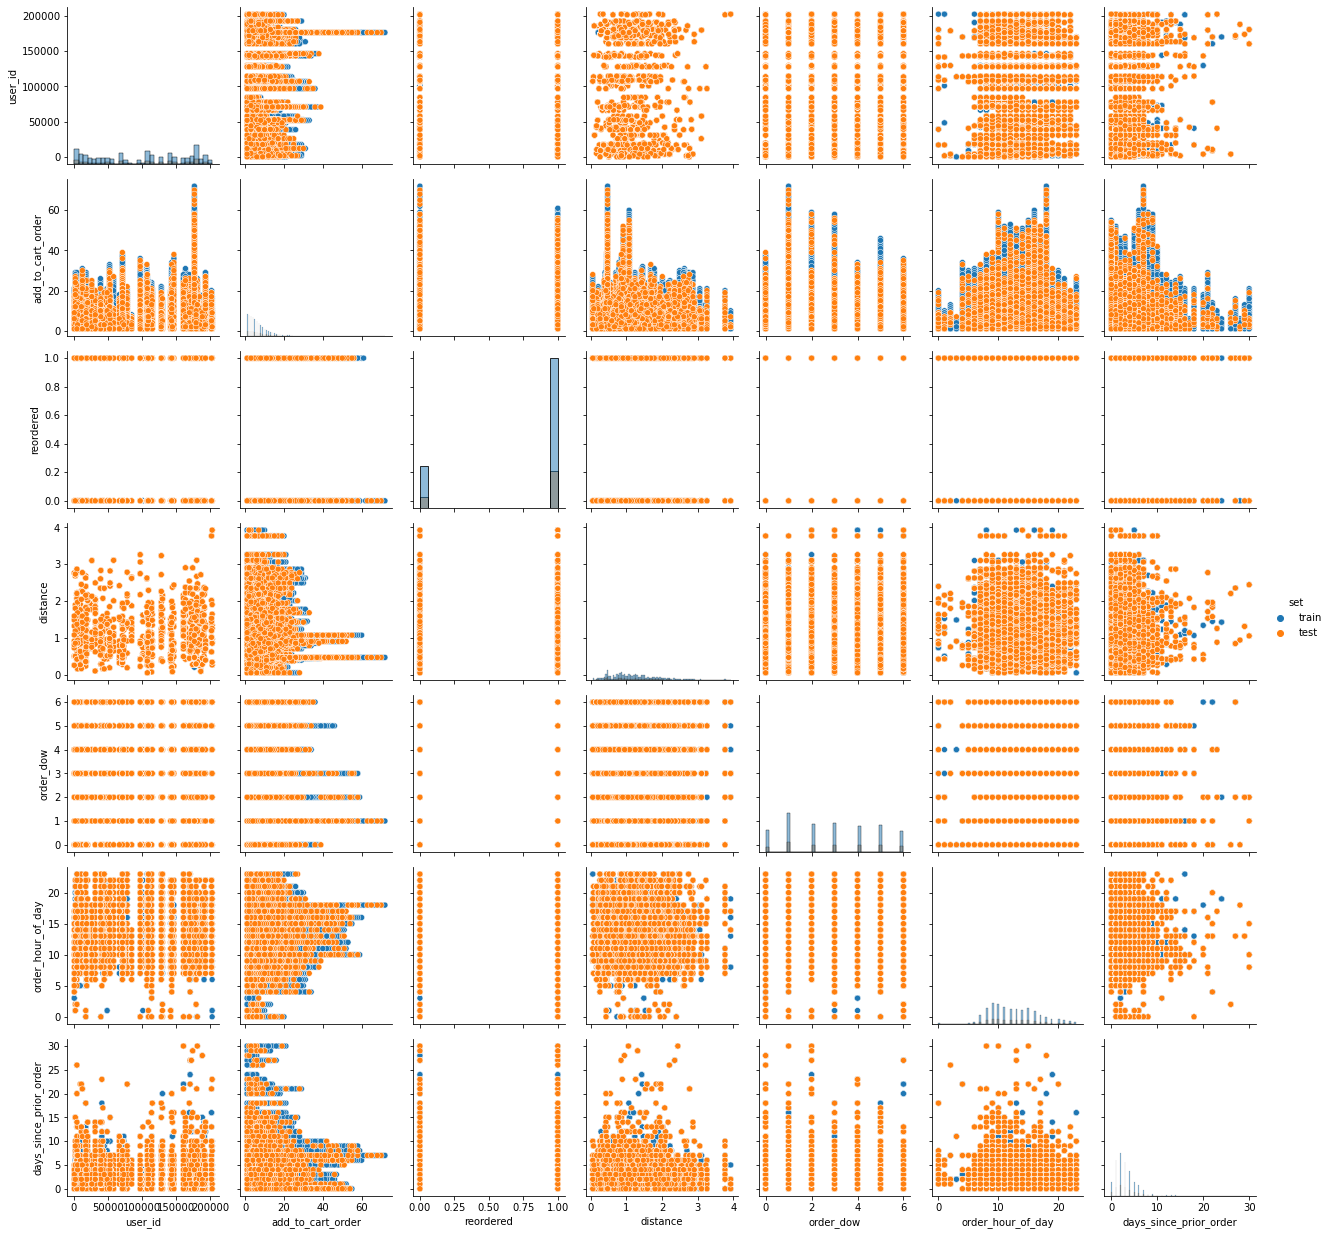

In [60]:
# sns.barplot()
full_df.columns
# Useful columns:
#   add_to_cart_order
#   reordered
#   distance
#   order_number
#   order_dow
#   order_hour_of_day
#   days_since_prior_order
#   set

# hue / style / size

useful_columns = ["user_id", "add_to_cart_order", "reordered", "distance", "order_dow", "order_hour_of_day", "days_since_prior_order", "set"]

# sns.histplot(

# )

fig = plt.figure(figsize=(10, 10))

# g = sns.PairGrid(full_df, hue="set")
g = sns.PairGrid(full_df[useful_columns], hue="set")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();




<AxesSubplot:>

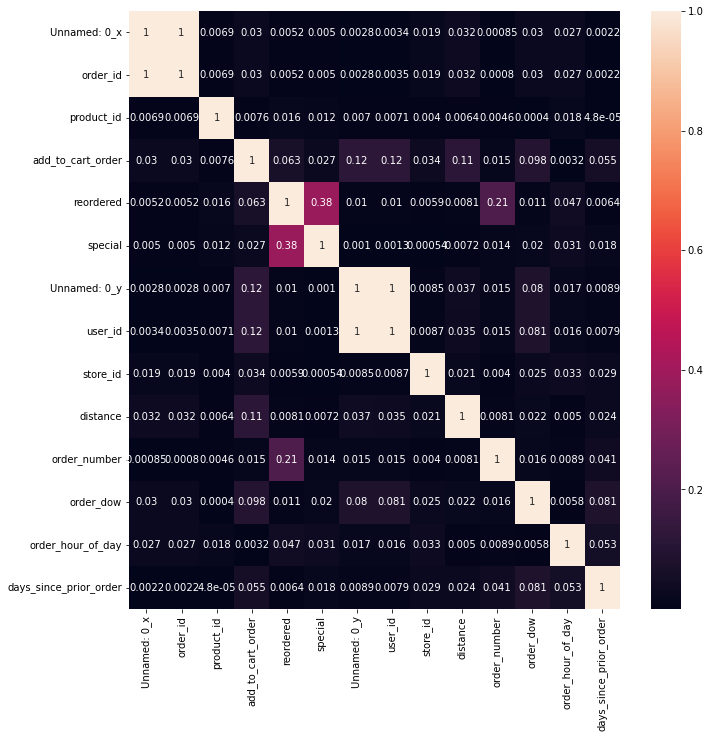

In [51]:
data_corr = restricted_order.corr()
plt.figure(figsize = (11,11))
sns.heatmap(abs(data_corr), annot = True)

### CNN

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

train_x = train_df.loc[:, train_df.columns != "reordered"]
train_y = train_df["reordered"]

test_x = test_df.loc[:, test_df.columns != "reordered"]
test_y = test_df["reordered"]

layers = [
    (i, j)
    for i in [5, 10, 25, 50, 100]
    for j in [5, 10, 25, 50, 100]
]

params = {
    "hidden_layer_sizes": layers,
    "activation": ["relu"]
}


clf = MLPClassifier(hidden_layer_sizes=(50, 50), activation="relu")
clf.out_activation_ = 'softmax'

clf_hp = GridSearchCV(clf, param_grid=params)
clf_hp.fit(X=train_x, y=train_y)

C:\Users\padda\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(50, 50)),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(5, 5), (5, 10), (5, 25),
                                                (5, 50), (5, 100), (10, 5),
                                                (10, 10), (10, 25), (10, 50),
                                                (10, 100), (25, 5), (25, 10),
                                                (25, 25), (25, 50), (25, 100),
                                                (50, 5), (50, 10), (50, 25),
                                                (50, 50), (50, 100), (100, 5),
                                                (100, 10), (100, 25), (100, 50),
                                                (100, 100)]})

In [46]:
from sklearn.metrics import confusion_matrix


best_params = clf_hp.best_params_
pred = clf_hp.predict(test_x)

tn, fp, fn, tp = confusion_matrix(y_true=test_y, y_pred=pred).ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = (2 * precision * recall) / (precision + recall)

In [49]:
print(best_params)
print(F1)

{'activation': 'relu', 'hidden_layer_sizes': (100, 100)}
0.8768616762386839


### Conclusion

a) Selon la matrice de corrélation, il existe un petit corrélation entre le fait qu'un produit est en promotion et qu'il soit re-commandé. Le correlation entre les variables `reordered` et `order_id` provient probablement du fait que pour les premiers commandes enregistrés le variable `reordered` doit être 0 par défaut parce qu'il n'y a pas de données précedents pour verifier si le produit a déja été commandé par l'utilisateur. Sinon il n'y a pas d'autres correlations significants dans les données.

b) Les hyperparamètres sont le nombre de couches internes (2), les fonctions d'activation (relu et softmax), et les dimensions des couches internes.  

c) Selon le score F1, qui est proche de 1, le choix de modèle était judicieux. Contrairement à un modèle k-nn, ce modèle ne passe pas par toutes les données d'apprentissage pour effectuer une classification qui est plus efficace compte tenu de la taille de l'ensemble de données. De plus, les CNN peuvent modéliser n'importe quelle fonction continue contrairement à d'autres modèle, ce qui est utile dans ce cas car il n'y avait pas de corrélation évidente dans les données pour nous guider vers un autre modèle.

d) Le score F1 est proche de 1 ce qui nous indique de le precision et le recall doivent aussi être proche de 1 et donc il y a eu beaucoup plus de vrai positives que de faux positives ou faux negatives. Cela nous indique que le modèle fonctionne bien sur les cas positifs (reordered = 1)
